In [141]:
import os, sys
import copy
import pickle
import importlib
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 

import seaborn as sns

import scipy.stats as stats
import scipy.optimize as optimize 
from sklearn.decomposition import PCA
import scipy.signal as signal

import analysis
importlib.reload(analysis)
import figure_utils 
importlib.reload(figure_utils)


<module 'pathway_utils' from '/home/masse/work/PsychADxD/7_trajectory/pathway_utils.py'>

# Model files and parameters

In [41]:
processed_data_path = "processed_data/"
cell_names = ["EN", "IN", "Astro", "Immune", "Oligo", "OPC", "Mural", "Endo"]
data_fns = [
    "EN.h5ad",
    "IN.h5ad",
    "Astro.h5ad",
    "Immune.h5ad",
    "Oligo.h5ad",
    "OPC.h5ad",
    "Mural.h5ad",
    "Endo.h5ad",
]
data_fns = [os.path.join(processed_data_path, fn) for fn in data_fns]

# Model accuracy (Figure 7b)

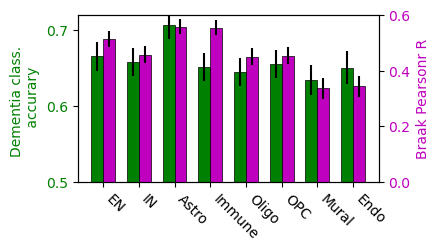

In [30]:
# Figure 7b
analysis.model_accuracy(data_fns, cell_names, n_repeats = 1_000, min_cell_count = 5, save_fig_fn = None)

# Monocle3 and Palantir pseudotime (Figure 7c and Supp. Figure 27)

In [112]:
traj_inference = analysis.TrajectoryInference("processed_data/Microglia_umap.h5ad")

In [116]:
traj_inference.compute_monocle3(n_max_repeats = 20) # using only 20 repeats to speed things up

Iteration 0 Pearsonr R = 0.180 max R = 0.180,
Iteration 1 Pearsonr R = 0.169 max R = 0.180,
Iteration 2 Pearsonr R = 0.162 max R = 0.180,
Iteration 3 Pearsonr R = 0.177 max R = 0.180,
Iteration 4 Pearsonr R = 0.178 max R = 0.180,
Iteration 5 Pearsonr R = 0.179 max R = 0.180,
Iteration 6 Pearsonr R = 0.163 max R = 0.180,
Iteration 7 Pearsonr R = 0.172 max R = 0.180,
Iteration 8 Pearsonr R = 0.172 max R = 0.180,
Iteration 9 Pearsonr R = 0.181 max R = 0.181,
Iteration 10 Pearsonr R = 0.170 max R = 0.181,
Iteration 11 Pearsonr R = 0.161 max R = 0.181,
Iteration 12 Pearsonr R = 0.176 max R = 0.181,
Iteration 13 Pearsonr R = 0.170 max R = 0.181,
Iteration 14 Pearsonr R = 0.169 max R = 0.181,
Iteration 15 Pearsonr R = 0.172 max R = 0.181,
Iteration 16 Pearsonr R = 0.169 max R = 0.181,
Iteration 17 Pearsonr R = 0.168 max R = 0.181,
Iteration 18 Pearsonr R = 0.180 max R = 0.181,
Iteration 19 Pearsonr R = 0.170 max R = 0.181,


In [114]:
traj_inference.compute_palantir(n_max_repeats = 2)

Sampling and flocking waypoints...
Time for determining waypoints: 0.18170182704925536 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 1.7296969175338746 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...
Iteration 0 Pearsonr R = 0.071 max R = 0.071,
Sampling and flocking waypoints...
Time for determining waypoints: 0.1804948091506958 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 1.6178302844365438 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption pr

/home/masse/work/PsychADxD/7_trajectory/analysis.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1, n].set_title(f"Disease pseudotime, R={r:1.3f}")


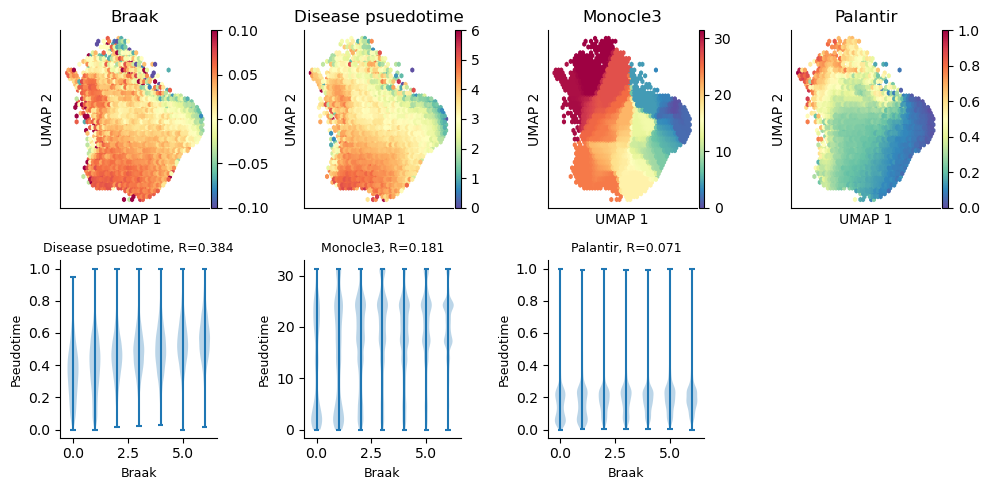

In [117]:
# Figure 7c and Supplementary Figure 27
traj_inference.generate_figure(save_fig_fn = None)

# PCA and transition points

In [50]:
gt = analysis.GlobalTrajectory(data_fns)

Number of genes: 17265
Number of eligible donors: 578
Correlation between actual and predicted Braak: 0.5373


In [51]:
gt.calculate_trajectories(k = "pred_BRAAK_AD")

In [52]:
gt.calculate_pca_transition_points(k = "pred_BRAAK_AD", n_components = 4)

/home/masse/miniconda3/envs/scanpy/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


 Transition times: donor 53 and donor 225


In [53]:
early_late_transition = gt.traj_data["t1_pct"]
prelim_transition = gt.traj_data["t0_pct"]

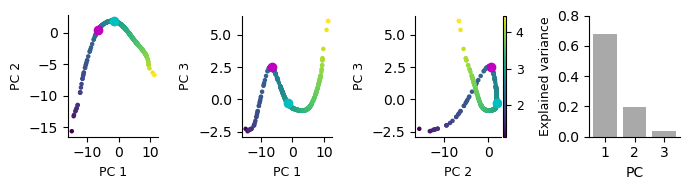

In [39]:
# Supplementary Figure 16
gt.plot_pca_figure(k = "pred_BRAAK_AD", save_fig_fn = None)

# Cell trajecotries
Used for Figures 7a&d, Supplementary Figure 17, and pathway enrichment

In [142]:
ct = analysis.CellTrajectories(
    data_fns, 
    cell_names = cell_names,  
    min_cell_count = 5,
    alpha = 4,
    edge = 0,
)

In [143]:
ct.caclulate_cell_trajectories()

Calculating trajectories for EN...
Calculating trajectories for IN...
Calculating trajectories for Astro...
Calculating trajectories for Immune...
Calculating trajectories for Oligo...
Calculating trajectories for OPC...
Calculating trajectories for Mural...
Calculating trajectories for Endo...


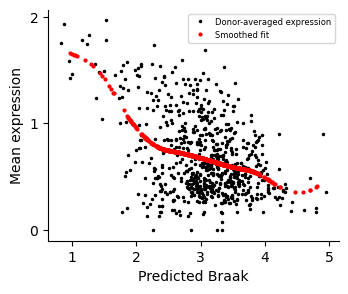

In [144]:
# Figure 7a
ct.plot_example_traj(gene_name = "NAV2", cell_name = "Immune", save_fig_fn = None)

/home/masse/miniconda3/envs/scanpy/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


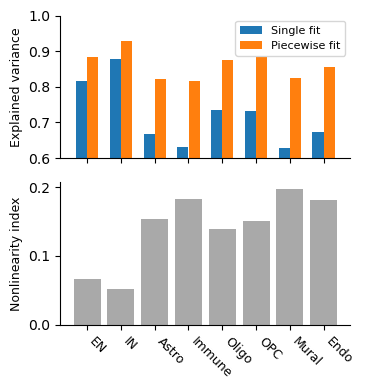

In [119]:
# Figure 7d and Supplementary Figure 17
ct.plot_nonlinearity(save_fig_fn = None)

In [145]:
# Early/late slopes with respect to predicted Braak, and resilience scores, are needed for downstream pathway enrichment (Zenith) analysis
transition_times_pct = [[0, early_late_transition], [early_late_transition, 1.0]]
ct.calculate_slopes(time_pts_pct = transition_times_pct, suffix = "early_late")

(687, 250)
AA (687,) (687,)
(687, 250)
AA (687,) (687,)
(687, 250)
AA (687,) (687,)
(687, 250)
AA (687,) (687,)


/home/masse/work/PsychADxD/7_trajectory/analysis.py:614: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  top_k=top_k_genes,
/home/masse/miniconda3/envs/scanpy/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


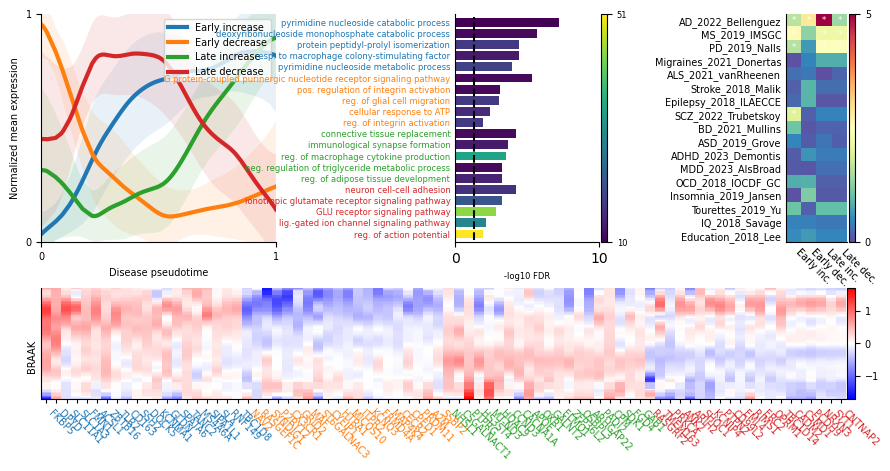

In [147]:
magma_fns = [
    "processed_data/magma_output/Immune_braak_early_top250_out.csv",
    "processed_data/magma_output/Immune_braak_early_bottom250_out.csv",
    "processed_data/magma_output/Immune_braak_late_top250_out.csv",
    "processed_data/magma_output/Immune_braak_late_bottom250_out.csv",
]

zenith_fns = [
    "processed_data/zenith_output_early_late/Immune_braak_early.csv", 
    "processed_data/zenith_output_early_late/Immune_braak_late.csv",
]

ct.plot_gene_summary(
    cell_name="Immune",
    zenith_fns=zenith_fns,
    magma_fns=magma_fns,
    top_k=250,
    xlabel="Disease pseudotime",
    save_fig_fn="/home/masse/work/capstone/figures/Immune_summary_capstone_1222.pdf",
    n_pathways=5,
    top_k_genes=20,
)

In [105]:
# Output slopes and resilience data to be used for Zenith
# Running Zenith can be performed using the R script pathway_enrichment.R
# NOTE: since GO ontologies are periodically updates, results may change slightly!!!
# Used for Figure 7e, Supplementary Figures 18-20
zenith_save_path = "/home/masse/work/PsychADxD/7_trajectory/processed_data/zenith_input_early_late"
ct.output_slopes_for_zenith(zenith_save_path = zenith_save_path, suffix = "early_late")

In [93]:
# Same as above, but using a sliding window across donors
# Used for Supplementary Figure 25
time_pts_donors = []
for n in range(0, 620, 20):
    time_pts_donors.append([n, n+60])
ct.calculate_slopes(time_pts_donors = time_pts_donors, suffix = "sliding_window", cell_names = ["Immune"])

In [126]:
# Output slopes and resilience data to be used for Zenith
zenith_save_path = "/home/masse/work/PsychADxD/7_trajectory/processed_data/zenith_input_sliding_window"
ct.output_slopes_for_zenith(zenith_save_path = zenith_save_path, suffix = "sliding_window", cell_names = ["Immune"])

# Pathway enrichment

In [19]:
input_path = "/home/masse/work/PsychADxD/7_trajectory/processed_data/zenith_output_early_late"
path_enr = analysis.PathEnrichmentAllCells(input_path)

In [85]:
path_enr.save_filtered_data("/home/masse/work/PsychADxD/7_trajectory/processed_data/rrvgo/rrvgo_input.csv")

In [86]:
rrvgo_df = pd.read_csv("/home/masse/work/PsychADxD/7_trajectory/processed_data/rrvgo/rrvgo_output.csv")

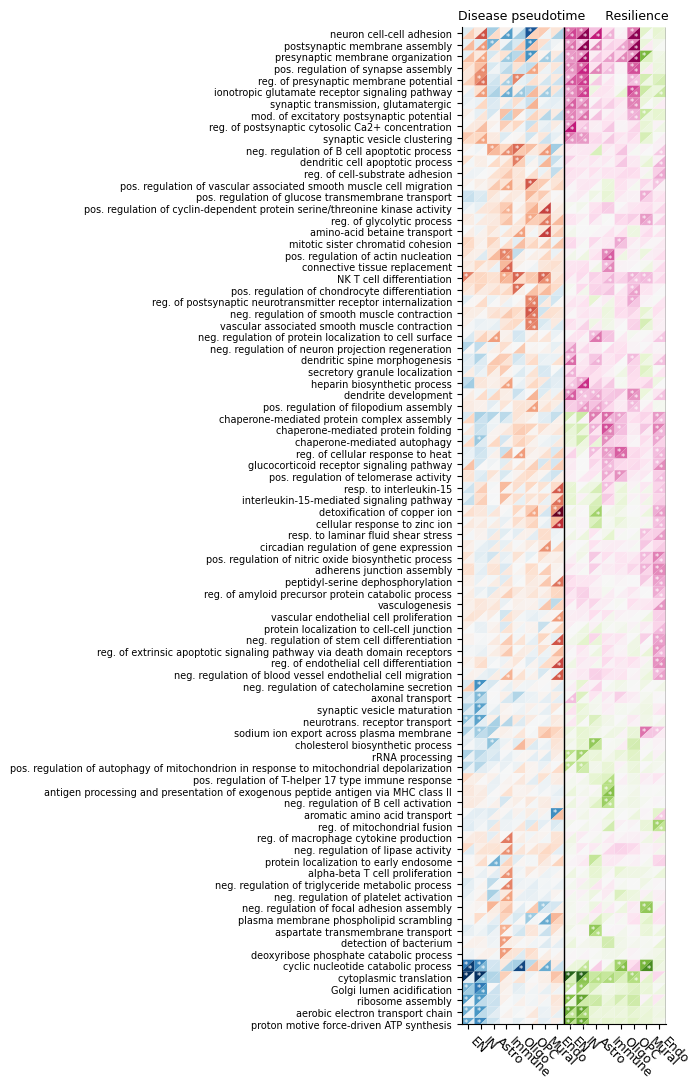

In [87]:
# Supplementary Figure 18 (heatmap of Braak slopes and Resilience scores for all GO BP pathways from rrvgo analysis)
# Supplementary Figures 19 and 20 are analogous, except they show GO CC and GO MF pathways
paths = list(rrvgo_df.parentTerm.unique())
path_enr.generate_early_late_figure(paths, cluster_pathways = True, figsize=(7.0, 11.0), save_fig_fn = None)

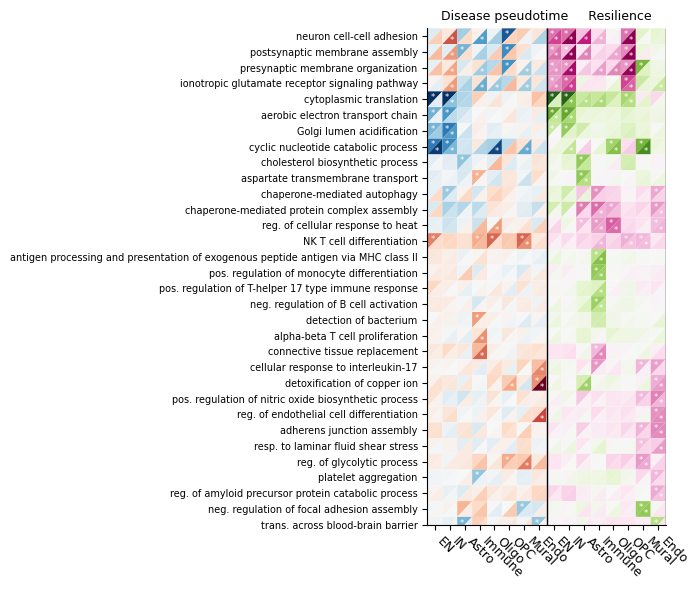

In [88]:
# Figure 7e
# pathway names (which were all outputs of the rrvgo analysis) are specified
paths = figure_utils.go_bp_paths_for_paper
path_enr.generate_early_late_figure(paths, cluster_pathways = False, figsize=(7.0, 6.0), save_fig_fn = None)

In [103]:
input_path = "/home/masse/work/PsychADxD/7_trajectory/processed_data/zenith_output_sliding_window"
path_enr = analysis.PathEnrichmentAllCells(input_path)

In [104]:
time_pts = ct.cell_traj["Immune"]["braak_mid_time_pts_sliding_window"]
# pathways are all GWAS significant
paths = figure_utils.go_bp_paths_for_paper_sliding_window
pred_braak_traj = ct.cell_traj["Immune"]["pred_braak_traj"]
transition_pts = [prelim_transition, early_late_transition]

(25, 100) 100 31 (25, 31)
t_new
[1.98778737 2.00556838 2.0233494  2.04113041 2.05891143 2.07669244
 2.09447346 2.11225448 2.13003549 2.14781651 2.16559752 2.18337854
 2.20115955 2.21894057 2.23672158 2.2545026  2.27228362 2.29006463
 2.30784565 2.32562666 2.34340768 2.36118869 2.37896971 2.39675072
 2.41453174 2.43231276 2.45009377 2.46787479 2.4856558  2.50343682
 2.52121783 2.53899885 2.55677987 2.57456088 2.5923419  2.61012291
 2.62790393 2.64568494 2.66346596 2.68124697 2.69902799 2.71680901
 2.73459002 2.75237104 2.77015205 2.78793307 2.80571408 2.8234951
 2.84127611 2.85905713 2.87683815 2.89461916 2.91240018 2.93018119
 2.94796221 2.96574322 2.98352424 3.00130526 3.01908627 3.03686729
 3.0546483  3.07242932 3.09021033 3.10799135 3.12577236 3.14355338
 3.1613344  3.17911541 3.19689643 3.21467744 3.23245846 3.25023947
 3.26802049 3.2858015  3.30358252 3.32136354 3.33914455 3.35692557
 3.37470658 3.3924876  3.41026861 3.42804963 3.44583064 3.46361166
 3.48139268 3.49917369 3.516954

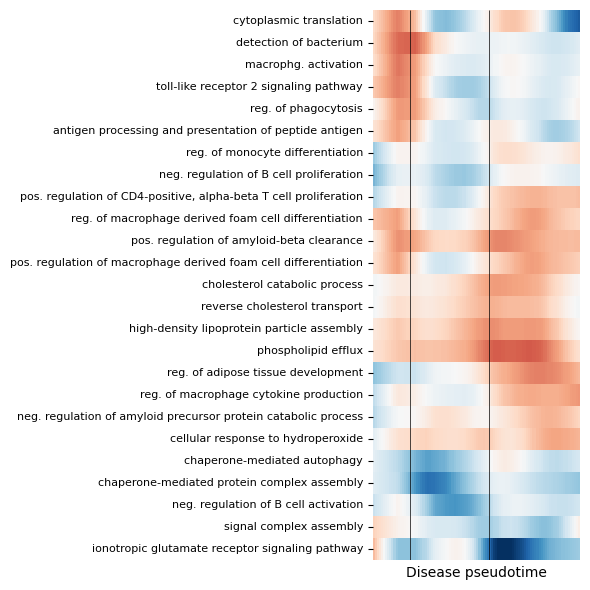

In [105]:
path_enr.generate_sliding_window_figure(
    paths,
    time_pts=time_pts,
    pred_braak_traj=pred_braak_traj,
    transition_pts=transition_pts,
    cluster_pathways=False,
    figsize=(6.0, 6.0),
    save_fig_fn=None,
)

['processed_data/EN.h5ad',
 'processed_data/IN.h5ad',
 'processed_data/Astro.h5ad',
 'processed_data/Immune.h5ad',
 'processed_data/Oligo.h5ad',
 'processed_data/OPC.h5ad',
 'processed_data/Mural.h5ad',
 'processed_data/Endo.h5ad']

In [54]:
early_late_transition

0.3892733564013841

In [56]:
ct.cell_traj["Immune"].keys()

dict_keys(['pred_braak', 'gene_exp', 'pred_braak_traj', 'gene_exp_traj', 'resilience_traj', 'pca_gene_exp_traj', 'slopes_sliding_window', 'resilience_sliding_window', 'braak_mid_time_pts_sliding_window'])

In [88]:
len(time_pts)

32

In [87]:
len(pred_braak_traj)

687